NAME - Arpita Nema

Student ID -202116004

NOTE : Dataset path - /content/drive/MyDrive/RS/LA_01_Dataset

Link to folder RS - https://drive.google.com/drive/folders/1HyCFjaBI6-Z-NqOtwf9x3e_l9tkYdI_v?usp=sharing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
from collections import defaultdict

###Reading CSV Files

In [3]:
raw_interactions_csv= pd.read_csv("/content/drive/MyDrive/RS/LA_01_Dataset/RAW_interactions.csv")
raw_interactions_csv


user_id  recipe_id        date  rating  \
0             38094      40893  2003-02-17       4   
1           1293707      40893  2011-12-21       5   
2              8937      44394  2002-12-01       4   
3            126440      85009  2010-02-27       5   
4             57222      85009  2011-10-01       5   
...             ...        ...         ...     ...   
1132362      116593      72730  2003-12-09       0   
1132363      583662     386618  2009-09-29       5   
1132364      157126      78003  2008-06-23       5   
1132365       53932      78003  2009-01-11       4   
1132366  2001868099      78003  2017-12-18       5   

                                                    review  
0        Great with a salad. Cooked on top of stove for...  
1        So simple, so delicious! Great for chilly fall...  
2        This worked very well and is EASY.  I used not...  
3        I made the Mexican topping and took it to bunk...  
4        Made the cheddar bacon topping, adding a sprin...  
...                                                    ...  
1132362  Another approach is to start making sauce with...  
1132363  These were so delicious!  My husband and I tru...  
1132364  WOW!  Sometimes I don't take the time to rate ...  
1132365  Very good!  I used regular port as well.  The ...  
1132366  I am so glad I googled and found this here. Th...  

[1132367 rows x 5 columns]

In [4]:
raw_recipes_csv= pd.read_csv("/content/drive/MyDrive/RS/LA_01_Dataset/RAW_recipes.csv")
raw_recipes_csv

name      id  minutes  \
0         arriba   baked winter squash mexican style  137739       55   
1                   a bit different  breakfast pizza   31490       30   
2                          all in the kitchen  chili  112140      130   
3                                 alouette  potatoes   59389       45   
4                 amish  tomato ketchup  for canning   44061      190   
...                                              ...     ...      ...   
231632                                   zydeco soup  486161       60   
231633                              zydeco spice mix  493372        5   
231634                     zydeco ya ya deviled eggs  308080       40   
231635        cookies by design   cookies on a stick  298512       29   
231636  cookies by design   sugar shortbread cookies  298509       20   

        contributor_id   submitted  \
0                47892  2005-09-16   
1                26278  2002-06-17   
2               196586  2005-02-25   
3                68585  2003-04-14   
4                41706  2002-10-25   
...                ...         ...   
231632          227978  2012-08-29   
231633         1500678  2013-01-09   
231634           37779  2008-06-07   
231635          506822  2008-04-15   
231636          506822  2008-04-15   

                                                     tags  \
0       ['60-minutes-or-less', 'time-to-make', 'course...   
1       ['30-minutes-or-less', 'time-to-make', 'course...   
2       ['time-to-make', 'course', 'preparation', 'mai...   
3       ['60-minutes-or-less', 'time-to-make', 'course...   
4       ['weeknight', 'time-to-make', 'course', 'main-...   
...                                                   ...   
231632  ['ham', '60-minutes-or-less', 'time-to-make', ...   
231633  ['15-minutes-or-less', 'time-to-make', 'course...   
231634  ['60-minutes-or-less', 'time-to-make', 'course...   
231635  ['30-minutes-or-less', 'time-to-make', 'course...   
231636  ['30-minutes-or-less', 'time-to-make', 'course...   

                                          nutrition  n_steps  \
0             [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1         [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2        [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
3         [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11   
4         [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   
...                                             ...      ...   
231632  [415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]        7   
231633        [14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]        1   
231634         [59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]        7   
231635    [188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]        9   
231636     [174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]        5   

                                                    steps  \
0       ['make a choice and proceed with recipe', 'dep...   
1       ['preheat oven to 425 degrees f', 'press dough...   
2       ['brown ground beef in large pot', 'add choppe...   
3       ['place potatoes in a large pot of lightly sal...   
4       ['mix all ingredients& boil for 2 1 / 2 hours ...   
...                                                   ...   
231632  ['heat oil in a 4-quart dutch oven', 'add cele...   
231633        ['mix all ingredients together thoroughly']   
231634  ['in a bowl , combine the mashed yolks and may...   
231635  ['place melted butter in a large mixing bowl a...   
231636  ['whip sugar and shortening in a large bowl , ...   

                                              description  \
0       autumn is my favorite time of year to cook! th...   
1       this recipe calls for the crust to be prebaked...   
2       this modified version of 'mom's' chili was a h...   
3       this is a super easy, great tasting, make ahea...   
4       my dh's amish mother raised him on this recipe...   
...                                                   ...   
231632  this is a delicious soup that i originally f

#**Dataset Analysis**
## Q1. Explore the dataset and summarize the item descriptor fields in the dataset assigned to you. Discuss which fields can be used as features for a content-based recommendation system. Explore PCA or sklearn’s feature selection for dimensionality reduction of the item-feature matrix.


##**Item Descriptor fields for content-based recommendation system**

In [5]:
recipe_descriptors=raw_recipes_csv[['id','name', 'tags', 'nutrition', 'description', 'ingredients']].head(1000)
recipe_descriptors

id                                               name  \
0    137739         arriba   baked winter squash mexican style   
1     31490                   a bit different  breakfast pizza   
2    112140                          all in the kitchen  chili   
3     59389                                 alouette  potatoes   
4     44061                 amish  tomato ketchup  for canning   
..      ...                                                ...   
995  262448                                           17 twist   
996  294427  1789  apple  arugula salad with aged gouda and...   
997  328436                                 18 carrot cupcakes   
998  357228              1880 chocolate spice cake  with icing   
999   50246                                    1890 cream cake   

                                                  tags  \
0    ['60-minutes-or-less', 'time-to-make', 'course...   
1    ['30-minutes-or-less', 'time-to-make', 'course...   
2    ['time-to-make', 'course', 'preparation', 'mai...   
3    ['60-minutes-or-less', 'time-to-make', 'course...   
4    ['weeknight', 'time-to-make', 'course', 'main-...   
..                                                 ...   
995  ['15-minutes-or-less', 'time-to-make', 'course...   
996  ['ham', '60-minutes-or-less', 'time-to-make', ...   
997  ['60-minutes-or-less', 'time-to-make', 'course...   
998  ['60-minutes-or-less', 'time-to-make', 'course...   
999  ['weeknight', 'time-to-make', 'course', 'main-...   

                                            nutrition  \
0               [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]   
1           [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]   
2          [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]   
3           [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]   
4           [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]   
..                                                ...   
995            [190.1, 0.0, 57.0, 0.0, 0.0, 0.0, 4.0]   
996       [884.8, 130.0, 45.0, 14.0, 23.0, 90.0, 6.0]   
997        [284.0, 22.0, 103.0, 5.0, 3.0, 29.0, 12.0]   
998        [208.5, 13.0, 71.0, 11.0, 6.0, 25.0, 10.0]   
999  [3600.1, 353.0, 494.0, 66.0, 279.0, 290.0, 88.0]   

                                           description  \
0    autumn is my favorite time of year to cook! th...   
1    this recipe calls for the crust to be prebaked...   
2    this modified version of 'mom's' chili was a h...   
3    this is a super easy, great tasting, make ahea...   
4    my dh's amish mother raised him on this recipe...   
..                                                 ...   
995              this is a great fruity tasting drink.   
996  ris lacoste was the chef at the 1789 restauran...   
997                          from rachel ray magazine.   
998                                            arcamax   
999  this is from one of my most prized cookbooks c...   

                                           ingredients  
0    ['winter squash', 'mexican seasoning', 'mixed ...  
1    ['prepared pizza crust', 'sausage patty', 'egg...  
2    ['ground beef', 'yellow onions', 'diced tomato...  
3    ['spreadable cheese with garlic and herbs', 'n...  
4    ['tomato juice', 'apple cider vinegar', 'sugar...  
..                                                 ...  
995           ['raspberry vodka', 'mountain dew soda']  
996  ['apple cider', 'shallots', 'fresh thyme', 're...  
997  ['light brown sugar', 'eggs', 'vegetable oil',...  
998  ['sugar', 'butter', 'egg', 'flour', 'salt', 'c...  
999  ['eggs', 'sugar', 'flour', 'cream of tartar', ...  

[1000 rows x 6 columns]

In [6]:
recipe_descriptors.shape[0]

1000

##**PCA on recipe - nutrition feature matrix**





Constructing recipe-nutrition matrix

In [7]:
#dictionary where key is recipe name and value is list of nutrition

Nutrient_list = ['calories', 'total_fat', 'sugar' , 'sodium' , 'protein'  , 'saturated fat', 'carbohydrates'];


#recipe_nutrition_dictionary=defaultdict(list)

recipe_nutrition_explode=[];

#recipe_descriptors.shape[0]
for ii in range(0,recipe_descriptors.shape[0]):
  old_nutrition_list=recipe_descriptors.iloc[ii]['nutrition'].replace("'","").replace("[","").replace("]", "").replace(" ", "").split(',');

  nutrition_list=[];

  for tg in old_nutrition_list:
    if len(tg)>2:
      nutrition_list.append(float(tg.strip()));


  recipe_L=[recipe_descriptors.iloc[ii]['id']];


  recipe_L.extend(nutrition_list);

  recipe_nutrition_explode.append(recipe_L);



#New data frame
cols=["id"];
cols.extend(Nutrient_list);

recipe_nutrition_explode_df=pd.DataFrame.from_records(recipe_nutrition_explode, columns=cols );




In [8]:
recipe_nutrition_explode_df

id  calories  total_fat  sugar  sodium  protein  saturated fat  \
0    137739      51.5        0.0   13.0     0.0      2.0            0.0   
1     31490     173.4       18.0    0.0    17.0     22.0           35.0   
2    112140     269.8       22.0   32.0    48.0     39.0           27.0   
3     59389     368.1       17.0   10.0     2.0     14.0            8.0   
4     44061     352.9        1.0  337.0    23.0      3.0            0.0   
..      ...       ...        ...    ...     ...      ...            ...   
995  262448     190.1        0.0   57.0     0.0      0.0            0.0   
996  294427     884.8      130.0   45.0    14.0     23.0           90.0   
997  328436     284.0       22.0  103.0     5.0      3.0           29.0   
998  357228     208.5       13.0   71.0    11.0      6.0           25.0   
999   50246    3600.1      353.0  494.0    66.0    279.0          290.0   

     carbohydrates  
0              4.0  
1              1.0  
2              5.0  
3             20.0  
4             28.0  
..             ...  
995            4.0  
996            6.0  
997           12.0  
998           10.0  
999           88.0  

[1000 rows x 8 columns]

Applying PCA now

In [9]:

pca = PCA(n_components=3)
recipe_nutrition_explode_df_reduced = pca.fit_transform(recipe_nutrition_explode_df[Nutrient_list])

In [10]:
recipe_nutrition_explode_df_reduced[0], recipe_nutrition_explode_df.iloc[0] , recipe_nutrition_explode_df_reduced.shape

(array([-413.26753594,  165.98315561,   42.77169344]),
 id               137739.0
 calories             51.5
 total_fat             0.0
 sugar                13.0
 sodium                0.0
 protein               2.0
 saturated fat         0.0
 carbohydrates         4.0
 Name: 0, dtype: float64,
 (1000, 3))

In [11]:
#recipe_nutrition_explode_df['recipe_name']

In [12]:
#recipe_nutrition_explode_df_reduced

In [13]:
#list(recipe_nutrition_explode_df_reduced[:,0])

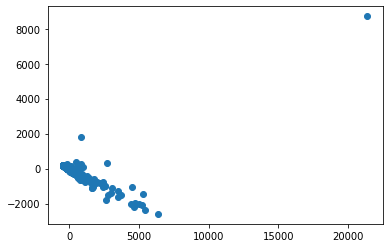

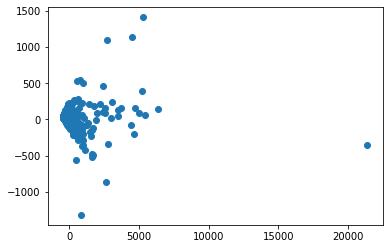

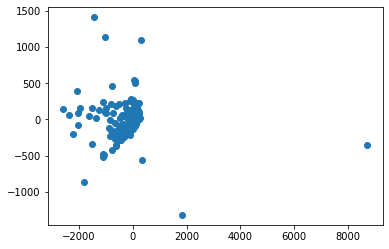

In [14]:
plt.figure();
plt.scatter( list(recipe_nutrition_explode_df_reduced[:,0]),list(recipe_nutrition_explode_df_reduced[:,1]))
plt.show()

plt.figure();
plt.scatter( list(recipe_nutrition_explode_df_reduced[:,0]),list(recipe_nutrition_explode_df_reduced[:,2]))
plt.show()


plt.figure();
plt.scatter( list(recipe_nutrition_explode_df_reduced[:,1]),list(recipe_nutrition_explode_df_reduced[:,2]))
plt.show()

#Q2. **Content-based (Memory-based) Recommendation**



##**1-hot keywords**

In [15]:
#dictionary where key is recipe name and value is list of tags

recipe_tag_dictionary=defaultdict(list)

global_tags=set();

#recipe_descriptors.shape[0]
for ii in range(0,recipe_descriptors.shape[0]):
  old_tag_list=recipe_descriptors.iloc[ii]['tags'].replace("'","").replace("[","").replace("]", "").replace(" ", "").split(',');

  tag_list=[];

  for tg in old_tag_list:
    if len(tg)>2:
      tag_list.append(tg.strip());


  recipe_id=recipe_descriptors.iloc[ii]['id'];

  recipe_tag_dictionary[recipe_id]=tag_list;

  global_tags=global_tags | set(tag_list); #| is used for union


#print(len(recipe_tag_dictionary))
#print(global_tags)
#print(len(global_tags))

global_tags=list(global_tags);
#global_tags
#2-D Mat
recipe_tag_explode=[];


cnt_global_tags = len(global_tags);

####
Q_i_tags=[];

for r_n in recipe_tag_dictionary:

  LL=[0]*cnt_global_tags;

  Tag_L=recipe_tag_dictionary[r_n]; 
  
  idx= [global_tags.index(x) for x in Tag_L];
  #print(idx)

  for idx_i in idx:
    LL[idx_i]=1;
  
  #print(LL)
  F=[r_n];

  F.extend(LL);
  Q_i_tags.append(LL);

  recipe_tag_explode.append(F);

 #New data frame
cols=["recipe_id"];
cols.extend(global_tags);

recipe_tags_explode_df=pd.DataFrame.from_records(recipe_tag_explode, columns=cols );




In [16]:
recipe_tags_explode_df

recipe_id  romantic  bok-choys  low-cholesterol  low-fat  chinese  \
0       137739         0          0                0        0        0   
1        31490         0          0                0        0        0   
2       112140         0          0                0        0        0   
3        59389         0          0                0        0        0   
4        44061         0          0                0        0        0   
..         ...       ...        ...              ...      ...      ...   
995     262448         0          0                1        1        0   
996     294427         0          0                0        0        0   
997     328436         0          0                0        0        0   
998     357228         0          0                0        0        0   
999      50246         0          0                0        0        0   

     pressure-cooker  leftovers  saltwater-fish  gifts  ...  moose  \
0                  0          0               0      0  ...      0   
1                  0          0               0      0  ...      0   
2                  0          0               0      0  ...      0   
3                  0          0               0      0  ...      0   
4                  0          0               0      0  ...      0   
..               ...        ...             ...    ...  ...    ...   
995                0          0               0      0  ...      0   
996                0          0               0      0  ...      0   
997                0          0               0      0  ...      0   
998                0          0               0      0  ...      0   
999                0          0               0      0  ...      0   

     pork-chops  white-rice  pork-ribs  stir-fry  high-protein  potluck  \
0             0           0          0         0             0        0   
1             0           0          0         0             0        0   
2             0           0          0         0             0        0   
3             0           0          0         0             0        0   
4             0           0          0         0             0        0   
..          ...         ...        ...       ...           ...      ...   
995           0           0          0         0             0        0   
996           0           0          0         0             0        0   
997           0           0          0         0             0        0   
998           0           0          0         0             0        0   
999           0           0          0         0             0        0   

     60-minutes-or-less  flat-shapes  chicken-breasts  
0                     1            0                0  
1                     0            0                0  
2                     0            0                0  
3                     1            0                0  
4                     0            0                0  
..                  ...          ...              ...  
995                   0            0                0  
996                   1            0                0  
997                   1            0                0  
998                   1            0                0  
999                   0            0                0  

[1000 rows x 372 columns]

Constructing user profile

In [17]:
raw_interactions_csv

user_id  recipe_id        date  rating  \
0             38094      40893  2003-02-17       4   
1           1293707      40893  2011-12-21       5   
2              8937      44394  2002-12-01       4   
3            126440      85009  2010-02-27       5   
4             57222      85009  2011-10-01       5   
...             ...        ...         ...     ...   
1132362      116593      72730  2003-12-09       0   
1132363      583662     386618  2009-09-29       5   
1132364      157126      78003  2008-06-23       5   
1132365       53932      78003  2009-01-11       4   
1132366  2001868099      78003  2017-12-18       5   

                                                    review  
0        Great with a salad. Cooked on top of stove for...  
1        So simple, so delicious! Great for chilly fall...  
2        This worked very well and is EASY.  I used not...  
3        I made the Mexican topping and took it to bunk...  
4        Made the cheddar bacon topping, adding a sprin...  
...                                                    ...  
1132362  Another approach is to start making sauce with...  
1132363  These were so delicious!  My husband and I tru...  
1132364  WOW!  Sometimes I don't take the time to rate ...  
1132365  Very good!  I used regular port as well.  The ...  
1132366  I am so glad I googled and found this here. Th...  

[1132367 rows x 5 columns]

In [18]:
our_recipe_ids=recipe_descriptors['id'].to_list();
#print(our_recipe_ids)

our_raw_interactions = raw_interactions_csv[(raw_interactions_csv['rating'] >0) & raw_interactions_csv['recipe_id'].isin(our_recipe_ids)];
our_raw_interactions

user_id  recipe_id        date  rating  \
152       222564     294427  2012-10-25       5   
565      2503874     129377  2012-11-16       4   
645       160974     232044  2007-10-03       5   
4868     1399224     392181  2009-09-29       5   
4869     1366254     392181  2009-10-01       5   
...          ...        ...         ...     ...   
1128544  1039982     336323  2010-03-05       5   
1128633   169969     132195  2006-01-16       5   
1128634   588529     132195  2008-11-25       4   
1131151   242766      83062  2007-01-01       5   
1131152   313014      83062  2007-09-09       5   

                                                    review  
152      Great, well balanced, sweet and savory, crispy...  
565      set up beautifully once it was completely cool...  
645      I couldn't resist even though it is fall! I wa...  
4868     Best copycat of Olive Garden's Black Tie that ...  
4869     I've never had Olive garden's version but this...  
...                                                    ...  
1128544  Awesome recipe! I made this about 10 times. Al...  
1128633  This is a simple all in one meal. I thought it...  
1128634  It was just alright for me. I found it way too...  
1131151  Delicious!!  This bread is very moist and flav...  
1131152  Very good! Moist and delicious.  I didn't have...  

[6717 rows x 5 columns]

In [19]:
our_user_ids=our_raw_interactions.user_id.unique();
print(len(our_user_ids))

4988


4988 users  X 1000 items

Finding users that interacted with more than 5 recipes - User profile will be build for these only for testing purpose


In [20]:
our_user_ids_reduced=[]

user_profile_for_tags=[];


for u in our_user_ids:
  
  #Getting interactions for this user
  df = our_raw_interactions[(our_raw_interactions['user_id'] == u) ] ;

  #print(df.shape)

  if(df.shape[0]>5) :
    #print("User id ", u);
    
    our_recipe_id_list = df['recipe_id'].to_list();


    df=recipe_tags_explode_df[recipe_tags_explode_df['recipe_id'].isin(our_recipe_id_list)].drop(['recipe_id'], axis=1)

    #print(df)
    LL=[];
    for x in df.sum(axis=0).to_list():
      if x >0 :
        LL.append(1);
      else:
        LL.append(0);
    #print(LL)

    user_profile_for_tags.append(LL);
    our_user_ids_reduced.append(u);


    
 
  #print("==============================================")


print(len(our_user_ids_reduced))

88


In [21]:
len(user_profile_for_tags), len(user_profile_for_tags[0])

(88, 371)

In [22]:
print(user_profile_for_tags)
print(our_user_ids_reduced)

[[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,

In [23]:
print(Q_i_tags)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [24]:
P_u_tags=np.array(user_profile_for_tags);
print(P_u_tags)
print(P_u_tags.shape)


[[0 0 1 ... 1 0 0]
 [0 0 1 ... 1 0 0]
 [0 0 1 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 0 0]]
(88, 371)


In [25]:
Q_i_tags=np.array(Q_i_tags);
Q_i_tags=Q_i_tags.T
print(Q_i_tags)
print(Q_i_tags.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 1 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(371, 1000)


The score that capture the relevance to user u of item i is simply the 
similarity of vectors Q_i and P_u

In [26]:
sim_u_i= np.dot(P_u_tags,Q_i_tags);
print(sim_u_i)
print(sim_u_i.shape)


[[15 14  7 ... 12  6 12]
 [ 9 10  5 ... 11  6 11]
 [16 18  8 ... 12  7 12]
 ...
 [13 13  6 ...  7  4 10]
 [13 17  7 ... 12  7 13]
 [13 16  6 ... 11  6 12]]
(88, 1000)


In [27]:
Recipe_Names=recipe_descriptors['name'].to_list();
print(Recipe_Names)
print(len(Recipe_Names))


['arriba   baked winter squash mexican style', 'a bit different  breakfast pizza', 'all in the kitchen  chili', 'alouette  potatoes', 'amish  tomato ketchup  for canning', 'apple a day  milk shake', 'aww  marinated olives', 'backyard style  barbecued ribs', 'bananas 4 ice cream  pie', 'beat this  banana bread', 'berry  good sandwich spread', 'better than sex  strawberries', 'better then bush s  baked beans', 'boat house  collard greens', 'calm your nerves  tonic', 'chicken lickin  good  pork chops', 'chile rellenos', 'chinese  candy', 'chinese  chop suey', 'cream  of cauliflower soup  vegan', 'cream  of spinach soup', 'cream  of spinach soup  vegan', 'crispy crunchy  chicken', 'deep fried dessert thingys', 'easiest ever  hollandaise sauce', 'emotional balance  spice mixture', 'fool the meat eaters  chili', 'forgotten  minestrone', 'fried  potatoes', 'george s at the cove  black bean soup', 'get the sensation  brownies', 'global gourmet  taco casserole', 'grilled  ranch bread', 'grilled

In [28]:
#sim_u_i[0]

In [29]:

Recommendations_based_on_tags=[];

for X in sim_u_i:
  
  Z = [x for _, x in sorted(zip(X,our_recipe_ids ), key=lambda pair: pair[0])]
  #print(Z)

  Recommendations_based_on_tags.append(Z);





For precision calculation we should not whether item is relevant or not, so I have considered user's rating for item i 

if r_u_i > 4
  
> then i is relavant for user u

else

> not relevant

In [30]:
our_raw_interactions

user_id  recipe_id        date  rating  \
152       222564     294427  2012-10-25       5   
565      2503874     129377  2012-11-16       4   
645       160974     232044  2007-10-03       5   
4868     1399224     392181  2009-09-29       5   
4869     1366254     392181  2009-10-01       5   
...          ...        ...         ...     ...   
1128544  1039982     336323  2010-03-05       5   
1128633   169969     132195  2006-01-16       5   
1128634   588529     132195  2008-11-25       4   
1131151   242766      83062  2007-01-01       5   
1131152   313014      83062  2007-09-09       5   

                                                    review  
152      Great, well balanced, sweet and savory, crispy...  
565      set up beautifully once it was completely cool...  
645      I couldn't resist even though it is fall! I wa...  
4868     Best copycat of Olive Garden's Black Tie that ...  
4869     I've never had Olive garden's version but this...  
...                                                    ...  
1128544  Awesome recipe! I made this about 10 times. Al...  
1128633  This is a simple all in one meal. I thought it...  
1128634  It was just alright for me. I found it way too...  
1131151  Delicious!!  This bread is very moist and flav...  
1131152  Very good! Moist and delicious.  I didn't have...  

[6717 rows x 5 columns]

In [31]:
print(our_recipe_ids)
print(len(our_recipe_ids))


[137739, 31490, 112140, 59389, 44061, 5289, 25274, 67888, 70971, 75452, 109439, 42198, 67547, 107517, 39959, 63986, 43026, 23933, 8559, 23850, 76808, 24701, 83873, 107699, 49262, 48156, 54272, 47366, 37073, 44123, 27087, 59952, 93249, 54100, 67664, 87098, 25775, 33165, 38798, 22123, 90921, 93959, 93958, 58224, 33606, 94710, 35173, 83025, 52804, 108414, 26995, 53402, 59632, 22526, 100870, 84797, 35653, 32169, 24478, 44045, 60219, 81185, 30131, 63593, 43164, 30300, 78655, 74805, 71635, 38276, 97052, 26835, 32271, 107229, 5060, 42570, 52443, 35595, 108804, 83950, 19208, 64302, 35964, 71457, 95926, 103948, 99024, 64045, 41756, 112959, 83062, 98930, 83133, 39947, 44895, 39363, 62368, 111875, 42522, 34930, 63793, 61973, 45859, 58651, 59534, 24137, 40237, 18537, 104243, 105069, 70099, 333281, 234069, 37841, 144952, 453467, 31835, 197013, 306168, 286009, 24514, 42508, 116679, 124286, 190, 475785, 17265, 50662, 177187, 118843, 208179, 500166, 501028, 136602, 69190, 503475, 522861, 457136, 45535

In [32]:
# df = our_raw_interactions[(our_raw_interactions['recipe_id'].isin(our_recipe_ids) ) ] ;
# print(df)

In [33]:

# df = our_raw_interactions[(our_raw_interactions['user_id'] == 222564) & (our_raw_interactions['recipe_id'].isin(our_recipe_ids) ) ] ;
# print(df)

In [34]:
from pandas._libs.hashtable import unique_label_indices
def get_TopNRecommendations_And_Precision( u , Mat , N):

  u_id= our_user_ids_reduced[u];
  #print(Mat[u][0:N-1]);
  Top_N_recipe_id = Mat[u][0:N-1];

  #calc precision

  #our_recipe_ids

  Top_N_recipe_Names = recipe_descriptors[recipe_descriptors['id'].isin(Top_N_recipe_id)]['name'].to_list();
  
  print("Recommended Recipes : ", Top_N_recipe_Names);


  #df = our_raw_interactions[(our_raw_interactions['user_id'] == u_id)  ] ;
  

  df = our_raw_interactions[(our_raw_interactions['user_id'] == u_id) & (our_raw_interactions['recipe_id'].isin(Top_N_recipe_id) ) ] ;
  #print(df)
  #print(df.shape)

  relevant_recommended_recipe_ids = df['recipe_id'].to_list();


  relevant_recommended_recipe_names = recipe_descriptors[recipe_descriptors['id'].isin(relevant_recommended_recipe_ids)]['name'].to_list();
  print("Relevant Recommended Recipes : ", relevant_recommended_recipe_names);



  if len(relevant_recommended_recipe_names)==0:
    return 0;
  else :
    return len(relevant_recommended_recipe_names) / N;





N_list = [5, 10, 15, 20, 25 , 50, 100,125 , 500 ]

Avg_precision_for_each_N= [];



for N in N_list:
  print("Top N = ", N , " recommendations for each user");

  
  Avg_Precision_list_tags=[];

  for u in range(0,len(our_user_ids_reduced)):
    u_id= our_user_ids_reduced[u];

    print("User_id : ", u_id)

    U_precision = get_TopNRecommendations_And_Precision(u,Recommendations_based_on_tags, N );

    print("Precision : ", U_precision);

    if U_precision >0:
      Avg_Precision_list_tags.append(U_precision);

    print("====================================================================================================")

    


  print("AVERAGE PRECISION IN CASE OF ONE-HOT KEYWORDS (RECIPE TAGS)")

  if len(Avg_Precision_list_tags) > 0:
    AP = sum(Avg_Precision_list_tags) / len(Avg_Precision_list_tags);
  else: 
    AP=0;  

  print(AP)

  Avg_precision_for_each_N.append(AP)

  print("\n\n====================================================================================================")

  print("====================================================================================================")

  print("====================================================================================================")

 


Top N =  5  recommendations for each user
User_id :  222564
Recommended Recipes :  ['sausage  and gravy  low fat', 'ritz  y chicken', 'wolfpack  pork sandwich', '100  whole grain wheat bread']
Relevant Recommended Recipes :  []
Precision :  0
User_id :  160974
Recommended Recipes :  ['it s greek to me  baked feta chicken', 'ritz  y chicken', 'wolfpack  pork sandwich', '100  whole grain wheat bread']
Relevant Recommended Recipes :  []
Precision :  0
User_id :  101823
Recommended Recipes :  ['lplermagronen', 'sausage  and gravy  low fat', 'ritz  y chicken', '100  whole grain wheat bread']
Relevant Recommended Recipes :  []
Precision :  0
User_id :  2000498330
Recommended Recipes :  ['sausage  and gravy  low fat', 'ritz  y chicken', '100  whole grain wheat bread', '16 bean soup  crockpot']
Relevant Recommended Recipes :  []
Precision :  0
User_id :  22015
Recommended Recipes :  ['sausage  and gravy  low fat', 'ritz  y chicken', 'wolfpack  pork sandwich', '100  whole grain wheat bread']
Re

In [35]:
print(Avg_precision_for_each_N)
print(N_list)

[0, 0, 0, 0, 0.04, 0.02, 0.013333333333333334, 0.011368421052631581, 0.004873239436619721]
[5, 10, 15, 20, 25, 50, 100, 125, 500]


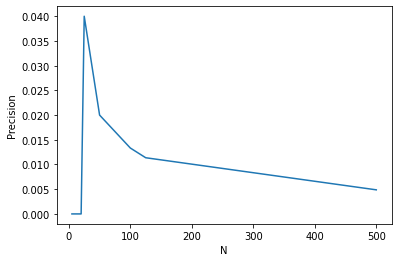

In [36]:
plt.figure();
plt.plot( N_list,Avg_precision_for_each_N)
plt.xlabel("N")
plt.ylabel("Precision")

plt.show()

##**Tf-idf**

In [37]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
  
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
  
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
  
VERB_CODES = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}

In [39]:
recipe_descriptors

id                                               name  \
0    137739         arriba   baked winter squash mexican style   
1     31490                   a bit different  breakfast pizza   
2    112140                          all in the kitchen  chili   
3     59389                                 alouette  potatoes   
4     44061                 amish  tomato ketchup  for canning   
..      ...                                                ...   
995  262448                                           17 twist   
996  294427  1789  apple  arugula salad with aged gouda and...   
997  328436                                 18 carrot cupcakes   
998  357228              1880 chocolate spice cake  with icing   
999   50246                                    1890 cream cake   

                                                  tags  \
0    ['60-minutes-or-less', 'time-to-make', 'course...   
1    ['30-minutes-or-less', 'time-to-make', 'course...   
2    ['time-to-make', 'course', 'preparation', 'mai...   
3    ['60-minutes-or-less', 'time-to-make', 'course...   
4    ['weeknight', 'time-to-make', 'course', 'main-...   
..                                                 ...   
995  ['15-minutes-or-less', 'time-to-make', 'course...   
996  ['ham', '60-minutes-or-less', 'time-to-make', ...   
997  ['60-minutes-or-less', 'time-to-make', 'course...   
998  ['60-minutes-or-less', 'time-to-make', 'course...   
999  ['weeknight', 'time-to-make', 'course', 'main-...   

                                            nutrition  \
0               [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]   
1           [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]   
2          [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]   
3           [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]   
4           [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]   
..                                                ...   
995            [190.1, 0.0, 57.0, 0.0, 0.0, 0.0, 4.0]   
996       [884.8, 130.0, 45.0, 14.0, 23.0, 90.0, 6.0]   
997        [284.0, 22.0, 103.0, 5.0, 3.0, 29.0, 12.0]   
998        [208.5, 13.0, 71.0, 11.0, 6.0, 25.0, 10.0]   
999  [3600.1, 353.0, 494.0, 66.0, 279.0, 290.0, 88.0]   

                                           description  \
0    autumn is my favorite time of year to cook! th...   
1    this recipe calls for the crust to be prebaked...   
2    this modified version of 'mom's' chili was a h...   
3    this is a super easy, great tasting, make ahea...   
4    my dh's amish mother raised him on this recipe...   
..                                                 ...   
995              this is a great fruity tasting drink.   
996  ris lacoste was the chef at the 1789 restauran...   
997                          from rachel ray magazine.   
998                                            arcamax   
999  this is from one of my most prized cookbooks c...   

                                           ingredients  
0    ['winter squash', 'mexican seasoning', 'mixed ...  
1    ['prepared pizza crust', 'sausage patty', 'egg...  
2    ['ground beef', 'yellow onions', 'diced tomato...  
3    ['spreadable cheese with garlic and herbs', 'n...  
4    ['tomato juice', 'apple cider vinegar', 'sugar...  
..                                                 ...  
995           ['raspberry vodka', 'mountain dew soda']  
996  ['apple cider', 'shallots', 'fresh thyme', 're...  
997  ['light brown sugar', 'eggs', 'vegetable oil',...  
998  ['sugar', 'butter', 'egg', 'flour', 'salt', 'c...  
999  ['eggs', 'sugar', 'flour', 'cream of tartar', ...  

[1000 rows x 6 columns]

In [40]:
#recipe_descriptions = recipe_descriptors[['id' , 'name' , 'description' ]].rename(columns={'id':'recipe_id'})

In [41]:
recipe_descriptions = recipe_descriptors[['name' , 'description' ]]

In [42]:
def preprocess(text):
  #print(text)
  try: 
    text = text.lower()
  except:
    text="NOT AVAILABLE";
  temp_sent =[]
  words = nltk.word_tokenize(text)
  tags = nltk.pos_tag(words)
  for i, word in enumerate(words):
      if tags[i][1] in VERB_CODES: 
          lemmatized = lemmatizer.lemmatize(word, 'v')
      else:
          lemmatized = lemmatizer.lemmatize(word)
      if lemmatized not in stop_words and lemmatized.isalpha():
          temp_sent.append(lemmatized)
          
  finalsent = ' '.join(temp_sent)
  finalsent = finalsent.replace("n't", " not")
  finalsent = finalsent.replace("'m", " am")
  finalsent = finalsent.replace("'s", " is")
  finalsent = finalsent.replace("'re", " are")
  finalsent = finalsent.replace("'ll", " will")
  finalsent = finalsent.replace("'ve", " have")
  finalsent = finalsent.replace("'d", " would")
  return finalsent
  
recipe_descriptions["preprocess_description"]= recipe_descriptions['description'].apply(preprocess)
recipe_descriptions.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


name  \
0  arriba   baked winter squash mexican style   
1            a bit different  breakfast pizza   
2                   all in the kitchen  chili   
3                          alouette  potatoes   
4          amish  tomato ketchup  for canning   

                                         description  \
0  autumn is my favorite time of year to cook! th...   
1  this recipe calls for the crust to be prebaked...   
2  this modified version of 'mom's' chili was a h...   
3  this is a super easy, great tasting, make ahea...   
4  my dh's amish mother raised him on this recipe...   

                              preprocess_description  
0  autumn favorite time year cook recipe prepare ...  
1  recipe call crust prebaked bit add ingredient ...  
2  modified version chili hit christmas party mak...  
3  super easy great tasting make ahead side dish ...  
4  dh amish mother raise recipe much prefers ketc...

In [43]:
recipe_descriptions

name  \
0           arriba   baked winter squash mexican style   
1                     a bit different  breakfast pizza   
2                            all in the kitchen  chili   
3                                   alouette  potatoes   
4                   amish  tomato ketchup  for canning   
..                                                 ...   
995                                           17 twist   
996  1789  apple  arugula salad with aged gouda and...   
997                                 18 carrot cupcakes   
998              1880 chocolate spice cake  with icing   
999                                    1890 cream cake   

                                           description  \
0    autumn is my favorite time of year to cook! th...   
1    this recipe calls for the crust to be prebaked...   
2    this modified version of 'mom's' chili was a h...   
3    this is a super easy, great tasting, make ahea...   
4    my dh's amish mother raised him on this recipe...   
..                                                 ...   
995              this is a great fruity tasting drink.   
996  ris lacoste was the chef at the 1789 restauran...   
997                          from rachel ray magazine.   
998                                            arcamax   
999  this is from one of my most prized cookbooks c...   

                                preprocess_description  
0    autumn favorite time year cook recipe prepare ...  
1    recipe call crust prebaked bit add ingredient ...  
2    modified version chili hit christmas party mak...  
3    super easy great tasting make ahead side dish ...  
4    dh amish mother raise recipe much prefers ketc...  
..                                                 ...  
995                           great fruity taste drink  
996  ri lacoste chef restaurant georgetown washingt...  
997                                rachel ray magazine  
998                                            arcamax  
999  one prized cookbook compendium cookery reliabl...  

[1000 rows x 3 columns]

In [44]:
recipe_descriptions = recipe_descriptions.set_index('name')

In [45]:
recipe_descriptions

description  \
name                                                                                                    
arriba   baked winter squash mexican style          autumn is my favorite time of year to cook! th...   
a bit different  breakfast pizza                    this recipe calls for the crust to be prebaked...   
all in the kitchen  chili                           this modified version of 'mom's' chili was a h...   
alouette  potatoes                                  this is a super easy, great tasting, make ahea...   
amish  tomato ketchup  for canning                  my dh's amish mother raised him on this recipe...   
...                                                                                               ...   
17 twist                                                        this is a great fruity tasting drink.   
1789  apple  arugula salad with aged gouda and ...  ris lacoste was the chef at the 1789 restauran...   
18 carrot cupcakes                                                          from rachel ray magazine.   
1880 chocolate spice cake  with icing                                                         arcamax   
1890 cream cake                                     this is from one of my most prized cookbooks c...   

                                                                               preprocess_description  
name                                                                                                   
arriba   baked winter squash mexican style          autumn favorite time year cook recipe prepare ...  
a bit different  breakfast pizza                    recipe call crust prebaked bit add ingredient ...  
all in the kitchen  chili                           modified version chili hit christmas party mak...  
alouette  potatoes                                  super easy great tasting make ahead side dish ...  
amish  tomato ketchup  for canning                  dh amish mother raise recipe much prefers ketc...  
...                                                                                               ...  
17 twist                                                                     great fruity taste drink  
1789  apple  arugula salad with aged gouda and ...  ri lacoste chef restaurant georgetown washingt...  
18 carrot cupcakes                                                                rachel ray magazine  
1880 chocolate spice cake  with icing                                                         arcamax  
1890 cream cake                                     one prized cookbook compendium cookery reliabl...  

[1000 rows x 2 columns]

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  

In [47]:
TFVEC = TfidfVectorizer()
TF_RECIPEID = TFVEC.fit_transform((recipe_descriptions["preprocess_description"]))

TF_COS_SIM = cosine_similarity(TF_RECIPEID, TF_RECIPEID)

In [48]:
TF_RECIPEID

<1000x3592 sparse matrix of type '<class 'numpy.float64'>'
	with 19062 stored elements in Compressed Sparse Row format>

In [49]:
TF_COS_SIM

array([[1.        , 0.01452315, 0.02625672, ..., 0.        , 0.        ,
        0.0644674 ],
       [0.01452315, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02625672, 0.        , 1.        , ..., 0.        , 0.        ,
        0.04759154],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.0644674 , 0.        , 0.04759154, ..., 0.        , 0.        ,
        1.        ]])

##**BERT**


In [50]:
#!pip install transformers

In [51]:
import torch
from transformers import AutoTokenizer, AutoModel

In [52]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [53]:
def TEXT_EMBED_BERT(text):
    input_ids = torch.tensor(tokenizer.encode(text)).unsqueeze(0)  
    outputs = model(input_ids)
    last_hidden_states = outputs[0].mean(1).detach().numpy()  
    return last_hidden_states



def GET_CONTEXT_VECS(text):
    bank_idx = tokenizer.encode(text).index(2924)
    v1 = TEXT_EMBED_BERT(text).detach().numpy()[0, bank_idx]
    print(v1.shape)
    return v1    

In [54]:
recipe_descriptors

id                                               name  \
0    137739         arriba   baked winter squash mexican style   
1     31490                   a bit different  breakfast pizza   
2    112140                          all in the kitchen  chili   
3     59389                                 alouette  potatoes   
4     44061                 amish  tomato ketchup  for canning   
..      ...                                                ...   
995  262448                                           17 twist   
996  294427  1789  apple  arugula salad with aged gouda and...   
997  328436                                 18 carrot cupcakes   
998  357228              1880 chocolate spice cake  with icing   
999   50246                                    1890 cream cake   

                                                  tags  \
0    ['60-minutes-or-less', 'time-to-make', 'course...   
1    ['30-minutes-or-less', 'time-to-make', 'course...   
2    ['time-to-make', 'course', 'preparation', 'mai...   
3    ['60-minutes-or-less', 'time-to-make', 'course...   
4    ['weeknight', 'time-to-make', 'course', 'main-...   
..                                                 ...   
995  ['15-minutes-or-less', 'time-to-make', 'course...   
996  ['ham', '60-minutes-or-less', 'time-to-make', ...   
997  ['60-minutes-or-less', 'time-to-make', 'course...   
998  ['60-minutes-or-less', 'time-to-make', 'course...   
999  ['weeknight', 'time-to-make', 'course', 'main-...   

                                            nutrition  \
0               [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]   
1           [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]   
2          [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]   
3           [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]   
4           [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]   
..                                                ...   
995            [190.1, 0.0, 57.0, 0.0, 0.0, 0.0, 4.0]   
996       [884.8, 130.0, 45.0, 14.0, 23.0, 90.0, 6.0]   
997        [284.0, 22.0, 103.0, 5.0, 3.0, 29.0, 12.0]   
998        [208.5, 13.0, 71.0, 11.0, 6.0, 25.0, 10.0]   
999  [3600.1, 353.0, 494.0, 66.0, 279.0, 290.0, 88.0]   

                                           description  \
0    autumn is my favorite time of year to cook! th...   
1    this recipe calls for the crust to be prebaked...   
2    this modified version of 'mom's' chili was a h...   
3    this is a super easy, great tasting, make ahea...   
4    my dh's amish mother raised him on this recipe...   
..                                                 ...   
995              this is a great fruity tasting drink.   
996  ris lacoste was the chef at the 1789 restauran...   
997                          from rachel ray magazine.   
998                                            arcamax   
999  this is from one of my most prized cookbooks c...   

                                           ingredients  
0    ['winter squash', 'mexican seasoning', 'mixed ...  
1    ['prepared pizza crust', 'sausage patty', 'egg...  
2    ['ground beef', 'yellow onions', 'diced tomato...  
3    ['spreadable cheese with garlic and herbs', 'n...  
4    ['tomato juice', 'apple cider vinegar', 'sugar...  
..                                                 ...  
995           ['raspberry vodka', 'mountain dew soda']  
996  ['apple cider', 'shallots', 'fresh thyme', 're...  
997  ['light brown sugar', 'eggs', 'vegetable oil',...  
998  ['sugar', 'butter', 'egg', 'flour', 'salt', 'c...  
999  ['eggs', 'sugar', 'flour', 'cream of tartar', ...  

[1000 rows x 6 columns]

In [55]:
BERT_RECIPE_DESCRIPTORS =recipe_descriptors[["id", "name", "description"]].head(50)
BERT_RECIPE_DESCRIPTORS

id                                               name  \
0   137739         arriba   baked winter squash mexican style   
1    31490                   a bit different  breakfast pizza   
2   112140                          all in the kitchen  chili   
3    59389                                 alouette  potatoes   
4    44061                 amish  tomato ketchup  for canning   
5     5289                            apple a day  milk shake   
6    25274                              aww  marinated olives   
7    67888                     backyard style  barbecued ribs   
8    70971                           bananas 4 ice cream  pie   
9    75452                            beat this  banana bread   
10  109439                        berry  good sandwich spread   
11   42198                      better than sex  strawberries   
12   67547                    better then bush s  baked beans   
13  107517                         boat house  collard greens   
14   39959                            calm your nerves  tonic   
15   63986                   chicken lickin  good  pork chops   
16   43026                                     chile rellenos   
17   23933                                     chinese  candy   
18    8559                                 chinese  chop suey   
19   23850                  cream  of cauliflower soup  vegan   
20   76808                             cream  of spinach soup   
21   24701                      cream  of spinach soup  vegan   
22   83873                            crispy crunchy  chicken   
23  107699                         deep fried dessert thingys   
24   49262                    easiest ever  hollandaise sauce   
25   48156                   emotional balance  spice mixture   
26   54272                        fool the meat eaters  chili   
27   47366                              forgotten  minestrone   
28   37073                                    fried  potatoes   
29   44123              george s at the cove  black bean soup   
30   27087                        get the sensation  brownies   
31   59952                     global gourmet  taco casserole   
32   93249                               grilled  ranch bread   
33   54100                           grilled  venison burgers   
34   67664                 healthy for them  yogurt popsicles   
35   87098                homemade  vegetable soup from a can   
36   25775  how i got my family to eat spinach  spinach ca...   
37   33165  i can t believe it s low fat  creamy potato salad   
38   38798                       i can t believe it s spinach   
39   22123       i don t feel like cooking tonight  casserole   
40   90921         i stole the idea from mirj  sesame noodles   
41   93959                      i yam what i yam two  muffins   
42   93958                          i yam what i yam  muffins   
43   58224              immoral  sandwich filling  loose meat   
44   33606                      italian sandwich  pasta salad   
45   94710                                     italian  fries   
46   35173                               italian  gut busters   
47   83025                      jeanne s style  birthday cake   
48   52804                     jiffy  extra moist carrot cake   
49  108414         jiffy  roasted corn and jalapeno cornbread   

                                          description  
0   autumn is my favorite time of year to cook! th...  
1   this recipe calls for the crust to be prebaked...  
2   this modified version of 'mom's' chili was a h...  
3   this is a super easy, great tasting, make ahea...  
4   my dh's amish mother raised him on this recipe...  
5                                                 NaN  
6   my italian mil was thoroughly impressed by my ...  
7   this recipe is posted by request and was origi...  
8                                                 NaN  
9                                 from ann hodgman's   
10  horseradish is one of my favorite condiments a...  
11  simple but sexy.

In [56]:
TEXT_EMBED_BERT("ri lacoste chef restaurant georgetown washington")

array([[ 2.85198577e-02,  6.65993094e-02,  8.92897993e-02,
         2.83376686e-02,  2.65302390e-01,  3.08552273e-02,
         4.31663059e-02,  4.44363534e-01, -2.03433007e-01,
        -5.33100426e-01,  2.07980663e-01, -1.30736560e-01,
         7.87768513e-02,  3.19879979e-01, -1.09215260e-01,
         2.51315057e-01, -7.99765810e-02,  4.78054211e-02,
         3.01996291e-01, -9.25117284e-02, -1.83847830e-01,
        -3.17264229e-01, -3.00724447e-01,  3.88259441e-01,
         2.15296835e-01,  2.71030664e-01, -2.50323981e-01,
        -1.27518028e-01, -1.78944762e-03,  1.27728254e-01,
         3.50257009e-01,  2.01582789e-01, -4.48990352e-02,
        -5.35518706e-01,  2.23966725e-02, -7.85586685e-02,
         4.04769957e-01,  2.16275737e-01, -8.88717175e-02,
         2.75035083e-01,  6.63317740e-04, -4.84675020e-01,
         4.96313006e-01, -1.04184009e-01,  6.68568909e-02,
        -3.34944248e-01,  2.22208239e-02,  1.37987465e-01,
        -6.36774749e-02, -1.85440391e-01, -3.93719465e-0

In [57]:
BERT_RECIPE_DESCRIPTORS['preprocess_description'] = BERT_RECIPE_DESCRIPTORS["description"].apply(preprocess)

In [58]:
BERT_RECIPE_DESCRIPTORS

id                                               name  \
0   137739         arriba   baked winter squash mexican style   
1    31490                   a bit different  breakfast pizza   
2   112140                          all in the kitchen  chili   
3    59389                                 alouette  potatoes   
4    44061                 amish  tomato ketchup  for canning   
5     5289                            apple a day  milk shake   
6    25274                              aww  marinated olives   
7    67888                     backyard style  barbecued ribs   
8    70971                           bananas 4 ice cream  pie   
9    75452                            beat this  banana bread   
10  109439                        berry  good sandwich spread   
11   42198                      better than sex  strawberries   
12   67547                    better then bush s  baked beans   
13  107517                         boat house  collard greens   
14   39959                            calm your nerves  tonic   
15   63986                   chicken lickin  good  pork chops   
16   43026                                     chile rellenos   
17   23933                                     chinese  candy   
18    8559                                 chinese  chop suey   
19   23850                  cream  of cauliflower soup  vegan   
20   76808                             cream  of spinach soup   
21   24701                      cream  of spinach soup  vegan   
22   83873                            crispy crunchy  chicken   
23  107699                         deep fried dessert thingys   
24   49262                    easiest ever  hollandaise sauce   
25   48156                   emotional balance  spice mixture   
26   54272                        fool the meat eaters  chili   
27   47366                              forgotten  minestrone   
28   37073                                    fried  potatoes   
29   44123              george s at the cove  black bean soup   
30   27087                        get the sensation  brownies   
31   59952                     global gourmet  taco casserole   
32   93249                               grilled  ranch bread   
33   54100                           grilled  venison burgers   
34   67664                 healthy for them  yogurt popsicles   
35   87098                homemade  vegetable soup from a can   
36   25775  how i got my family to eat spinach  spinach ca...   
37   33165  i can t believe it s low fat  creamy potato salad   
38   38798                       i can t believe it s spinach   
39   22123       i don t feel like cooking tonight  casserole   
40   90921         i stole the idea from mirj  sesame noodles   
41   93959                      i yam what i yam two  muffins   
42   93958                          i yam what i yam  muffins   
43   58224              immoral  sandwich filling  loose meat   
44   33606                      italian sandwich  pasta salad   
45   94710                                     italian  fries   
46   35173                               italian  gut busters   
47   83025                      jeanne s style  birthday cake   
48   52804                     jiffy  extra moist carrot cake   
49  108414         jiffy  roasted corn and jalapeno cornbread   

                                          description  \
0   autumn is my favorite time of year to cook! th...   
1   this recipe calls for the crust to be prebaked...   
2   this modified version of 'mom's' chili was a h...   
3   this is a super easy, great tasting, make ahea...   
4   my dh's amish mother raised him on this recipe...   
5                                                 NaN   
6   my italian mil was thoroughly impressed by my ...   
7   this recipe is posted by request and was origi...   
8                                                 NaN   
9                                 from ann hodgman's    
10  horseradish is one of my favorite condiments a...   
11  simp

In [59]:
BERT_ENCODINGS_RECIPE_DESCRIPTION = BERT_RECIPE_DESCRIPTORS['preprocess_description'].head(50).apply(TEXT_EMBED_BERT)


In [60]:
BERT_ENCODINGS_RECIPE_DESCRIPTION_LIST = BERT_ENCODINGS_RECIPE_DESCRIPTION.to_list();
#BERT_ENCODINGS_RECIPE_DESCRIPTION_LIST

In [61]:
#BERT_ENCODINGS_RECIPE_DESCRIPTION[0] ,

BERT_ENCODINGS_RECIPE_DESCRIPTION[0].shape

(1, 768)

In [62]:
#BERT_ENCODINGS_RECIPE_DESCRIPTION[1] , BERT_ENCODINGS_RECIPE_DESCRIPTION[1].shape

In [63]:
type(BERT_ENCODINGS_RECIPE_DESCRIPTION[0]), type(BERT_ENCODINGS_RECIPE_DESCRIPTION[0][0]), type(BERT_ENCODINGS_RECIPE_DESCRIPTION[0][0][0])

(numpy.ndarray, numpy.ndarray, numpy.float32)

In [64]:
BERT_COS_SIM=cosine_similarity(BERT_ENCODINGS_RECIPE_DESCRIPTION_LIST[0], BERT_ENCODINGS_RECIPE_DESCRIPTION_LIST[1])
BERT_COS_SIM

array([[0.7504417]], dtype=float32)

In [65]:
BERT_RECIPE_ID_LIST = BERT_RECIPE_DESCRIPTORS["id"].to_list();
#BERT_RECIPE_ID_LIST

In [66]:
our_raw_interactions

user_id  recipe_id        date  rating  \
152       222564     294427  2012-10-25       5   
565      2503874     129377  2012-11-16       4   
645       160974     232044  2007-10-03       5   
4868     1399224     392181  2009-09-29       5   
4869     1366254     392181  2009-10-01       5   
...          ...        ...         ...     ...   
1128544  1039982     336323  2010-03-05       5   
1128633   169969     132195  2006-01-16       5   
1128634   588529     132195  2008-11-25       4   
1131151   242766      83062  2007-01-01       5   
1131152   313014      83062  2007-09-09       5   

                                                    review  
152      Great, well balanced, sweet and savory, crispy...  
565      set up beautifully once it was completely cool...  
645      I couldn't resist even though it is fall! I wa...  
4868     Best copycat of Olive Garden's Black Tie that ...  
4869     I've never had Olive garden's version but this...  
...                                                    ...  
1128544  Awesome recipe! I made this about 10 times. Al...  
1128633  This is a simple all in one meal. I thought it...  
1128634  It was just alright for me. I found it way too...  
1131151  Delicious!!  This bread is very moist and flav...  
1131152  Very good! Moist and delicious.  I didn't have...  

[6717 rows x 5 columns]

In [67]:
BERT_INTERRACTIONS = our_raw_interactions[our_raw_interactions['recipe_id'].isin(BERT_RECIPE_ID_LIST)];
BERT_INTERRACTIONS

user_id  recipe_id        date  rating  \
5283       33188      58224  2004-07-30       5   
5294       33443      58224  2004-03-21       5   
5295       28346      58224  2004-07-11       5   
5297      115053      58224  2004-08-18       4   
5298      101823      58224  2004-09-25       4   
...          ...        ...         ...     ...   
1053557   415551      43026  2009-01-15       5   
1053559  1436178      43026  2009-11-04       5   
1053560   126440      43026  2009-11-06       5   
1053562   329638      43026  2010-10-06       5   
1053563  1951766      43026  2011-07-08       5   

                                                    review  
5283     These are so good!! My family devoured them - ...  
5294     This was easy, delicious, and extremely versat...  
5295     Yummm!!  I sampled this a few times as it was ...  
5297     This was great.  I halved the recipe for just ...  
5298     This was a cheesy twist on sloppy joes.  It ma...  
...                                                    ...  
1053557  Oh wow, I remember having this at a little pla...  
1053559  I grew up eating these on Football sundays. We...  
1053560  Loved this recipe.  I only made four as an app...  
1053562  These were awesome!  I used fresh poblanos, ro...  
1053563  Yum!  We're making rellenos tonight and LOVE t...  

[335 rows x 5 columns]

In [68]:
len(BERT_INTERRACTIONS["user_id"].unique())

319

In [69]:
BERT_INTERRACTIONS["user_id"].value_counts() 

28649      3
65056      3
22015      3
37036      2
130219     2
          ..
45668      1
29956      1
112080     1
804931     1
1951766    1
Name: user_id, Length: 319, dtype: int64

In [70]:
BERT_USER_ID_LIST = BERT_INTERRACTIONS.user_id.mode().to_list()

In [71]:
BERT_INTERRACTIONS[BERT_INTERRACTIONS['user_id'].isin(BERT_USER_ID_LIST)]


user_id  recipe_id        date  rating  \
160580     65056      48156  2004-10-12       5   
475862     65056      39959  2005-05-21       5   
478177     28649      54100  2004-07-19       4   
483898     22015      93959  2004-07-15       4   
531719     28649      22123  2002-07-17       5   
594383     28649      63986  2004-11-27       4   
609534     22015      25775  2005-08-24       4   
853576     65056      75452  2005-04-14       5   
1040662    22015      23933  2002-05-21       5   

                                                    review  
160580   I am just begining to learn a bit about Ayurve...  
475862   This certainly is a blessing!  I had to omit t...  
478177   What a great way to use up some ground venison...  
483898   This is a light & tender muffin.  The spices w...  
531719   This was great!!  I put it all together when I...  
594383   The pork chops were very tender and tasty.  I ...  
609534   Very cheesy.  I love spinach so I'm willing to...  
853576   Ohhhhhh, the flavor of this is superb.  BF pic...  
1040662  Does sound strange, but put all together it re...

In [72]:
#Suppose we want to give recommendation to user u = 28649

bert_user_id= 28649;

BERT_TEST_INTERACTION = BERT_INTERRACTIONS[BERT_INTERRACTIONS['user_id'] ==bert_user_id];
BERT_TEST_INTERACTION



user_id  recipe_id        date  rating  \
478177    28649      54100  2004-07-19       4   
531719    28649      22123  2002-07-17       5   
594383    28649      63986  2004-11-27       4   

                                                   review  
478177  What a great way to use up some ground venison...  
531719  This was great!!  I put it all together when I...  
594383  The pork chops were very tender and tasty.  I ...

In [73]:
#FINDING ENCODINGS for review of user u 

BERT_TEST_INTERACTION['preprocessed_review'] = BERT_TEST_INTERACTION["review"].apply(preprocess)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
BERT_TEST_INTERACTION

user_id  recipe_id        date  rating  \
478177    28649      54100  2004-07-19       4   
531719    28649      22123  2002-07-17       5   
594383    28649      63986  2004-11-27       4   

                                                   review  \
478177  What a great way to use up some ground venison...   
531719  This was great!!  I put it all together when I...   
594383  The pork chops were very tender and tasty.  I ...   

                                      preprocessed_review  
478177  great way use ground venison surprise taste li...  
531719  great put together get home work time leftover...  
594383  pork chop tender tasty impressed good taste ma...

In [75]:
BERT_TEST_USER_REVIEW = (" ").join(BERT_TEST_INTERACTION['preprocessed_review'].to_list());#.join(" ");
BERT_TEST_USER_REVIEW

'great way use ground venison surprise taste like venison cooked use cast iron skillet make dh want grill next time quick easy make thanks great put together get home work time leftover today use pea make next time try broccoli really remind potpie simple make quick pork chop tender tasty impressed good taste make thanks chuck'

In [76]:
BERT_ENCODINGS_USER_REVIEW=TEXT_EMBED_BERT(BERT_TEST_USER_REVIEW);
BERT_ENCODINGS_USER_REVIEW.shape

(1, 768)

In [77]:
BERT_COS_SIM_TEST_USER=[];

for i in BERT_ENCODINGS_RECIPE_DESCRIPTION_LIST:
  BERT_COS_SIM_TEST_USER.append(cosine_similarity(BERT_ENCODINGS_USER_REVIEW, i))


In [78]:
BERT_COS_SIM_TEST_USER[0:5]

[array([[0.77895695]], dtype=float32),
 array([[0.8465939]], dtype=float32),
 array([[0.84240794]], dtype=float32),
 array([[0.8615457]], dtype=float32),
 array([[0.8269205]], dtype=float32)]

In [79]:
#BERT_RECIPE_DESCRIPTORS

In [80]:
BERT_RECIPE_NAME_LIST=BERT_RECIPE_DESCRIPTORS["id"].to_list();

In [81]:
BERT_RECIPE_NAME_LIST[0:5]

[137739, 31490, 112140, 59389, 44061]

In [82]:
BERT_TEST_RECIPE_ID_SORTED = [x for _,x in sorted(zip(BERT_COS_SIM_TEST_USER,BERT_RECIPE_NAME_LIST))]

In [83]:
BERT_TEST_RECIPE_ID_SORTED[0:2]

[5289, 70971]

In [84]:
BERT_TEST_RECIPE_NAME_RECOMMENDED = BERT_RECIPE_DESCRIPTORS[BERT_RECIPE_DESCRIPTORS['id'].isin(BERT_TEST_RECIPE_ID_SORTED)]['name'].to_list();


In [85]:
BERT_TEST_USER_P_list=[]
BERT_N_LIST = [5, 10, 15 , 20, 25, 50];
for N in BERT_N_LIST:
  

  print("RECOMMENDED TOP K= " , N , "  RECIPES FOR USER : ", bert_user_id  )
  print(BERT_TEST_RECIPE_NAME_RECOMMENDED[0:N])
  BERT_PRECISION_CALC_NUM=list(set(BERT_TEST_INTERACTION["recipe_id"].to_list()) & set(BERT_TEST_RECIPE_ID_SORTED[0:N]))
  if len(BERT_PRECISION_CALC_NUM)==0:
    precision=0;
  else:
    precision=len(BERT_PRECISION_CALC_NUM)/N;

  print("PRECISION :",precision )
  BERT_TEST_USER_P_list.append(precision)

  print("=====================================================")


RECOMMENDED TOP K=  5   RECIPES FOR USER :  28649
['arriba   baked winter squash mexican style', 'a bit different  breakfast pizza', 'all in the kitchen  chili', 'alouette  potatoes', 'amish  tomato ketchup  for canning']
PRECISION : 0
RECOMMENDED TOP K=  10   RECIPES FOR USER :  28649
['arriba   baked winter squash mexican style', 'a bit different  breakfast pizza', 'all in the kitchen  chili', 'alouette  potatoes', 'amish  tomato ketchup  for canning', 'apple a day  milk shake', 'aww  marinated olives', 'backyard style  barbecued ribs', 'bananas 4 ice cream  pie', 'beat this  banana bread']
PRECISION : 0.1
RECOMMENDED TOP K=  15   RECIPES FOR USER :  28649
['arriba   baked winter squash mexican style', 'a bit different  breakfast pizza', 'all in the kitchen  chili', 'alouette  potatoes', 'amish  tomato ketchup  for canning', 'apple a day  milk shake', 'aww  marinated olives', 'backyard style  barbecued ribs', 'bananas 4 ice cream  pie', 'beat this  banana bread', 'berry  good sandwic

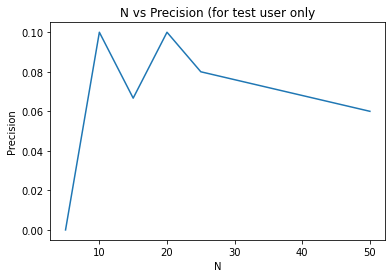

In [86]:
plt.figure();
plt.plot( BERT_N_LIST,BERT_TEST_USER_P_list)
plt.xlabel("N")
plt.ylabel("Precision")
plt.title("N vs Precision (for test user only")
plt.show()

# Q3. **Content-based (Model-based) Recommendation**







##**KNN**



In [87]:
IDX = pd.Series(recipe_descriptions.index)
print(IDX)  


def recommendations(title, cosine_sim = TF_COS_SIM):
    recommended_recipes = []
    
    index = IDX [IDX  == title].index[0]
    
    similarity_scores = pd.Series(cosine_sim[index]).sort_values(ascending = False)
    
    top_10_recipes = list(similarity_scores.iloc[1:11].index)
    for i in top_10_recipes:
        recommended_recipes.append(list(recipe_descriptions.index)[i])
    return recommended_recipes

0             arriba   baked winter squash mexican style
1                       a bit different  breakfast pizza
2                              all in the kitchen  chili
3                                     alouette  potatoes
4                     amish  tomato ketchup  for canning
                             ...                        
995                                             17 twist
996    1789  apple  arugula salad with aged gouda and...
997                                   18 carrot cupcakes
998                1880 chocolate spice cake  with icing
999                                      1890 cream cake
Name: name, Length: 1000, dtype: object


In [88]:
recommendations("1890 cream cake")


['1 2 3 4  tater tot casserole',
 'like money for nuthin    fudge',
 'italian sandwich  pasta salad',
 'rainbow chicken strips',
 'elmer s  summertime sweet onion salsa',
 'sun dried   tomatoes',
 'exotic fruits  barbecue marinade',
 'the elvis  smoothie',
 '13 crackers meatloaf',
 'chicken lickin  good  pork chops']

In [89]:
N_list=[ 5, 10, 15, 20, 25];

for N in N_list:

  print("Top N = ", N , " recommendations for each user");

  for u in range(0,len(our_user_ids_reduced)):
    u_id= our_user_ids_reduced[u];

    print("User_id : ", u_id);

    df = our_raw_interactions[(our_raw_interactions['user_id'] == u_id)  ] ;
    #print(df)
    #print(df.shape)

    dummy_check_for_relevance = df['rating'].to_list();
    #print(dummy_check_for_relevance)

    user_interacted_recipe_ids = df['recipe_id'].to_list();

    #print(user_interacted_recipe_ids)

    #finding recipe names corresponding to these recipe_ids

    user_interacted_recipe_names=recipe_descriptors[recipe_descriptors['id'].isin(user_interacted_recipe_ids)]['name'].to_list();

    candidate_set=recipe_descriptors[~ recipe_descriptors['id'].isin(user_interacted_recipe_ids)]['name'].to_list();


    #print(user_interacted_recipe_names)

    # Here I am finding similar items to first highest rated recipe
    for u_i_r_n in user_interacted_recipe_names[0:1]:
      index = IDX [IDX  == u_i_r_n].index[0]
      similarity_scores = pd.Series(TF_COS_SIM[index]).sort_values(ascending = False)

      top_10_recipes = list(similarity_scores.iloc[1:N+1].index)
      recommended_recipes=[];
      for i in top_10_recipes:
        recommended_recipes.append(list(recipe_descriptions.index)[i])
      
      print(N, " - Recommended Recipes", recommended_recipes)
      #break;


    print("========================================================================================")

    

  print("\n\n\n========================================================================================")
  print("========================================================================================")
  print("========================================================================================")



Top N =  5  recommendations for each user
User_id :  222564
5  - Recommended Recipes ['to your health  muffins', '21  apple pie', 'splenda   d  cheesecake sugar free low carb', '100 year old pie crust  pastry dough', '15 minute garlic lemon chicken']
User_id :  160974
5  - Recommended Recipes ['fake   blueberry cheesecake', 'margarita  dip', '15 minute jello trifle', 'better than sex  strawberries', '100  whole grain pizza dough']
User_id :  101823
5  - Recommended Recipes ['need a pick me up  banana peanut butter smoothie  no', 'jello  chocolate pudding pops', 'leftover  rice pudding', 'lighter  lamb moussaka', 'make ahead  flaky sausage foldovers']
User_id :  2000498330
5  - Recommended Recipes ['sesame  noodles with peanut sauce', '100  whole wheat burger hot dog buns', '1 3  pound squeeze burger', 'hamburger  buns  zero carb', 'i hate miracle whip  but i love this potato salad that s']
User_id :  22015
5  - Recommended Recipes ['tis the season coconut macaroons', '11 secret herbs a

##**Preparing Data for logistic Regression and Naive Bayes - Content Based Models**

```
# This is formatted as code
```



In [90]:
LR_USER_ID_LIST = raw_interactions_csv.user_id.mode().to_list()

In [91]:
LR_USER_ID_LIST

[424680]

In [92]:
LR_TEST_DF=raw_interactions_csv[(raw_interactions_csv["user_id"]==424680 ) & (raw_interactions_csv["rating"]> 0) & (raw_interactions_csv["rating"]<6)]
LR_TEST_DF

user_id  recipe_id        date  rating  \
149       424680     256416  2009-11-02       5   
351       424680     408997  2011-10-18       5   
440       424680     426090  2010-05-29       5   
587       424680     175614  2008-06-09       5   
597       424680     383271  2009-08-31       5   
...          ...        ...         ...     ...   
1131984   424680     289382  2008-05-02       5   
1132110   424680     116551  2011-08-07       5   
1132175   424680     441819  2011-01-24       5   
1132319   424680     190261  2010-05-13       5   
1132320   424680     290157  2008-05-11       5   

                                                    review  
149      Made this with raw apple cider & my last bag o...  
351      Used Gala apples for these muffins & I was ver...  
440      Really enjoyed working with the mustard seeds ...  
587      I cut back on the amount of red pepper, but ot...  
597      Don't know if I changed the taste or texture o...  
...                                                    ...  
1131984  I used cheese tortellini in this recipe & redu...  
1132110  When it comes to smoothies, I don't usually li...  
1132175  I was a little hesitant about making a recipe ...  
1132319  What a great way to dress up the ol' carrot! D...  
1132320  Yet another great spice mix (& that includes y...  

[7665 rows x 5 columns]

In [93]:
#Getting Training and Testing data


CB_X=[];
CB_Recipe_ID=[]

CB_Y=[];


for i in range(0, len(LR_TEST_DF)):

  


  #print(i)


  #print(type(r_id))

  RATING=LR_TEST_DF.iloc[i]["rating"];

  if(RATING > 4):
    r=1;
  else:
    r=0;

  if(r==1 and CB_Y.count(1) > 220):
    continue;


  CB_Y.append(r);

  r_id=LR_TEST_DF.iloc[i]["recipe_id"];
  CB_Recipe_ID.append(r_id);


  df=raw_recipes_csv[raw_recipes_csv["id"]==r_id ]
  
  old_nutrition_list=df["nutrition"].to_list()[0].replace("'","").replace("[","").replace("]", "").replace(" ", "").split(',');

  nutrition_list=[];

  for tg in old_nutrition_list:
    if len(tg)>2:
      nutrition_list.append(float(tg.strip()));
  
  #print(df["nutrition"].to_list()[0])
  #print(nutrition_list)

  CB_X.append(nutrition_list)


    


In [94]:
print(CB_Recipe_ID)
print(len(CB_Recipe_ID))


[256416, 408997, 426090, 175614, 383271, 174219, 257453, 348112, 411350, 99672, 423430, 41230, 215757, 210276, 323571, 384106, 324948, 196312, 261175, 188566, 373608, 362066, 176690, 443155, 450058, 55571, 418750, 99221, 337971, 203418, 53594, 79378, 333474, 310373, 351711, 185550, 258345, 446919, 122397, 190338, 410716, 170922, 121245, 11040, 260089, 216528, 344382, 318320, 104201, 122390, 400243, 266242, 457689, 460206, 146603, 456082, 293914, 404697, 436800, 308249, 348783, 452965, 260915, 277082, 266416, 413368, 444275, 353805, 371553, 161339, 317250, 33939, 309926, 416558, 275623, 97459, 220018, 289962, 326256, 426125, 232946, 301941, 406458, 195448, 38426, 140167, 380941, 460122, 44221, 160058, 308176, 310540, 80489, 341112, 441181, 447538, 449876, 162806, 400240, 167938, 248248, 252120, 322394, 265589, 279261, 241750, 343851, 293175, 146167, 260860, 120211, 337269, 428136, 330929, 123616, 264666, 222619, 380852, 330981, 51468, 231581, 244763, 462206, 399654, 134854, 463550, 4579

In [95]:
print(CB_X)
print(len(CB_X))

[[114.4, 0.0, 98.0, 0.0, 0.0, 0.0, 9.0], [187.4, 9.0, 46.0, 11.0, 6.0, 19.0, 9.0], [58.6, 4.0, 15.0, 8.0, 3.0, 1.0, 2.0], [851.6, 47.0, 371.0, 142.0, 53.0, 15.0, 44.0], [856.3, 52.0, 139.0, 107.0, 39.0, 21.0, 40.0], [227.0, 16.0, 86.0, 1.0, 5.0, 46.0, 11.0], [1059.8, 82.0, 121.0, 98.0, 131.0, 144.0, 25.0], [401.5, 41.0, 32.0, 6.0, 10.0, 34.0, 11.0], [723.5, 83.0, 110.0, 19.0, 41.0, 58.0, 16.0], [347.6, 24.0, 22.0, 17.0, 67.0, 21.0, 5.0], [382.8, 25.0, 23.0, 27.0, 38.0, 22.0, 13.0], [169.3, 14.0, 67.0, 0.0, 2.0, 6.0, 7.0], [308.0, 15.0, 16.0, 51.0, 14.0, 13.0, 15.0], [186.1, 17.0, 7.0, 5.0, 15.0, 35.0, 4.0], [301.2, 28.0, 66.0, 8.0, 26.0, 22.0, 8.0], [232.6, 6.0, 14.0, 12.0, 17.0, 2.0, 14.0], [265.0, 13.0, 24.0, 15.0, 47.0, 20.0, 7.0], [86.9, 0.0, 72.0, 0.0, 1.0, 0.0, 7.0], [307.9, 23.0, 15.0, 23.0, 17.0, 32.0, 12.0], [59.0, 2.0, 0.0, 4.0, 16.0, 4.0, 0.0], [452.8, 39.0, 132.0, 19.0, 16.0, 71.0, 16.0], [404.0, 18.0, 21.0, 32.0, 69.0, 24.0, 12.0], [244.8, 15.0, 19.0, 29.0, 18.0, 25.0, 9.0

In [96]:
print(CB_Y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [97]:
print("Total no. of recipes ", len(CB_Y))

print("No. of liked recipes : " , CB_Y.count(1))
print("No. of disliked recipes : " , CB_Y.count(0))


Total no. of recipes  441
No. of liked recipes :  221
No. of disliked recipes :  220


In [98]:

from sklearn.model_selection import train_test_split

CB_X_train, CB_X_val, CB_Y_train, CB_Y_val = train_test_split(CB_X, CB_Y, test_size=0.1, stratify=CB_Y)


In [99]:
#CB_Y_val

In [100]:
from sklearn import  metrics


## **Naive-Bayes**

In [101]:
from sklearn.naive_bayes import GaussianNB
NB_classifier = GaussianNB().fit(CB_X_train,CB_Y_train)
NB_Y_pred = NB_classifier.predict(CB_X_val)

NB_acc_score = NB_classifier.score(CB_X_val, CB_Y_val)
print("\nACCURACY in using Naive Bayes: " , NB_acc_score*100, "%")


from sklearn.metrics import precision_score
                
NB_precision_score = precision_score(CB_Y_val, NB_Y_pred)
print("\nPrecision Score :")
print(NB_precision_score)  


from sklearn import metrics
NB_cm = metrics.confusion_matrix(CB_Y_val, NB_Y_pred)
print("\nCONFUSION MATRIX:")
print(NB_cm)


ACCURACY in using Naive Bayes:  48.888888888888886 %

Precision Score :
0.5

CONFUSION MATRIX:
[[19  3]
 [20  3]]


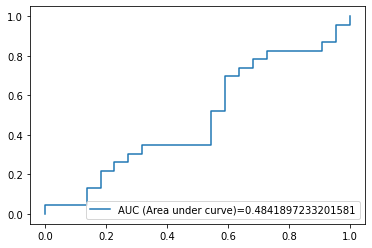

In [102]:
NB_y_pred_proba = NB_classifier.predict_proba(CB_X_val)[::,1]
NB_fpr, NB_tpr, _ = metrics.roc_curve(CB_Y_val,  NB_y_pred_proba)
NB_auc = metrics.roc_auc_score(CB_Y_val, NB_y_pred_proba)
plt.plot(NB_fpr, NB_tpr,label="AUC (Area under curve)="+str(NB_auc))
plt.legend(loc=4)
plt.show()

##**Logistic Regression**

In [103]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(random_state=0).fit(CB_X_train,CB_Y_train)
LR_Y_pred = LR_classifier.predict(CB_X_val)

LR_acc_score = LR_classifier.score(CB_X_val, CB_Y_val)
print("\nACCURACY in using logistic regression: " , LR_acc_score*100, "%")


from sklearn.metrics import precision_score
                
LR_precision_score = precision_score(CB_Y_val, LR_Y_pred)
print("\nPrecision Score :")
print(LR_precision_score)  


from sklearn import metrics
LR_cm = metrics.confusion_matrix(CB_Y_val, LR_Y_pred)
print("\nCONFUSION MATRIX:")
print(LR_cm)





ACCURACY in using logistic regression:  53.333333333333336 %

Precision Score :
0.5625

CONFUSION MATRIX:
[[15  7]
 [14  9]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


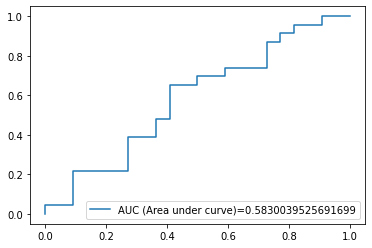

In [104]:
LR_y_pred_proba = LR_classifier.predict_proba(CB_X_val)[::,1]
LR_fpr, LR_tpr, _ = metrics.roc_curve(CB_Y_val,  LR_y_pred_proba)
LR_auc = metrics.roc_auc_score(CB_Y_val, LR_y_pred_proba)
plt.plot(LR_fpr,LR_tpr,label="AUC (Area under curve)="+str(LR_auc))
plt.legend(loc=4)
plt.show()